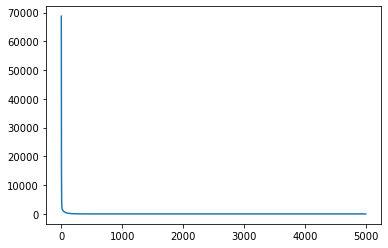

w1 = 1.9987296451395842, w2 = 2.998016797760077, b = 7.327773495767915, MSE_train = 1.1076369794133667 sau 4056 vòng lặp


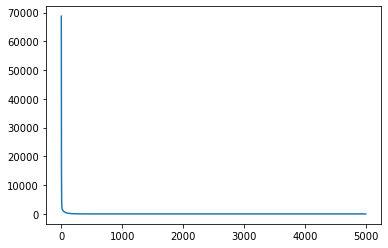

MSE_test = 1.1999067594993766
run time 0.45692014694213867


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
np.random.seed(3)
X1 = np.random.randint(11, high=161, size=150, dtype=int)
X2 = np.random.randint(6, high=156, size=150, dtype=int)
y = 2*X1 + 3*X2 + 7 + np.random.randn(150)
y = y.reshape(-1, 1)
one_b = np.ones((X1.shape[0], 1))
X = np.concatenate((X1.reshape(-1, 1), X2.reshape(-1, 1), one_b), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 100)
def value(X, w_b):
    return X.dot(w_b.reshape(-1, 1)); # mảng w_b ban đầu là mảng 1 chiều dùng reshape để chuyên về nhiều hàng 1 cột, để nhân có hướng với X
def L_MSE(y_predict, y):
    a = (y_predict - y)**2
    return np.mean(a);
def derivative_MSE_wb(X, y, y_predict): 
    a = X*(y_predict - y);
    return np.mean(a, axis=0);
w1 = 1
w2 = 1
b = 2
stored = [];
MSE = [];
u = 0.00001
u1 = 0.1
for i in range(0, 5000):
    w_b = np.array([w1, w2, b])
    y_predict = value(X_train, w_b)
    stored.append(w_b.copy());
    MSE.append(L_MSE(y_predict, y_train))
    derivate_MSE = derivative_MSE_wb(X_train, y_train, y_predict)
    w1 = w1 - u*derivate_MSE[0];
    w2 = w2 - u*derivate_MSE[1];
    b = b - u1*derivate_MSE[2];
#train
w_b = stored[MSE.index(min(MSE))]
w1, w2, b = w_b
plt.plot(MSE)
plt.show()
print("w1 = {0}, w2 = {1}, b = {2}, MSE_train = {3} sau {4} vòng lặp".format(w1, w2, b,min(MSE), MSE.index(min(MSE)) +1 ))
y_train_predict = value(X_train, w_b)
# bộ dữ liệu test
y_test_predict = value(X_test, w_b)
MSE_test = L_MSE(y_test_predict, y_test)
plt.plot(MSE)
plt.show()
print("MSE_test = {}".format(MSE_test))
run_time = time.time() - start_time
print('run time', run_time)